<a href="https://colab.research.google.com/github/gulzat-dev/ShortestPath/blob/master/3_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
!pip install pm4py

In [125]:
import tempfile
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from IPython.display import Image
from google.colab import drive
from pm4py.objects.log.importer.xes import importer as xes_importer

# Mount Google Drive
drive.mount('/content/drive')

file_name = 'BPI_Challenge_2019.xes'
file_path = f'/content/drive/MyDrive/files/{file_name}'

# Import the XES log file
log = xes_importer.apply(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

In [126]:
len(log)
log_df = pm4py.convert_to_dataframe(log)

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [127]:
len(log_df)

1595923

In [128]:
log_df = log_df.drop_duplicates()
log_df.reset_index(drop=True, inplace=True)
len(log_df)

1463175

In [129]:
filtered_log = pm4py.convert_to_event_log(log_df)

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [130]:
from pm4py.algo.filtering.log.variants import variants_filter
variant_dom_decl = variants_filter.get_variants(filtered_log)

from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_log)

len(variants_count)



11319

In [131]:
filtered_dataframe = pm4py.filter_end_activities(log_df, ['Clear Invoice', 'Record Invoice Receipt', 'Record Goods Receipt', 'Delete Purchase Order Item', 'Remove Payment Block', 'Cancel Invoice Receipt', 'Change Approval for Purchase Order', 'Record Service Entry Sheet', 'Change Delivery Indicator', 'Change Price', 'Change Quantity', 'Cancel Goods Receipt', 'Receive Order Confirmation', 'Block Purchase Order Item', 'Vendor creates invoice', 'Set Payment Block', 'SRM: Change was Transmitted', 'SRM: Transfer Failed (E.Sys.)', 'SRM: In Transfer to Execution Syst.', 'Cancel Subsequent Invoice', 'Change Storage Location', 'Reactivate Purchase Order Item', 'Record Subsequent Invoice', 'SRM: Deleted', 'SRM: Transaction Completed', 'Vendor creates debit memo', 'Change Final Invoice Indicator', 'Update Order Confirmation', 'Change Currency', 'Release Purchase Order', 'Change payment term'], activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [132]:
filtered_log = pm4py.convert_to_event_log(filtered_dataframe)

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [133]:
from pm4py.algo.filtering.log.variants import variants_filter
variant_dom_decl = variants_filter.get_variants(filtered_log)

from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_log)

len(variants_count)

11311

In [134]:
#filter by  filter_case_performance
import datetime

# Convert 3 years to milliseconds
two_years_ms = 3 * 365 * 24 * 60 * 60 * 1000

# Calculate the minimum duration in milliseconds
min_duration_ms = 1

# Convert the durations to timedelta objects
min_duration = datetime.timedelta(milliseconds=min_duration_ms)
max_duration = datetime.timedelta(milliseconds=two_years_ms)

# Filter the cases based on performance duration
filtered_log = pm4py.filter_case_performance(filtered_dataframe, min_duration.total_seconds(), max_duration.total_seconds())

In [ ]:
pm4py.write_xes(filtered_log, '/content/drive/MyDrive/files/exported_drop_updateendActivity_3years.xes')

exporting log, completed traces ::   0%|          | 0/247209 [00:00<?, ?it/s]

In [135]:
from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_log)

len(variants_count)

KeyboardInterrupt: ignored

In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter
variant_dom_decl = variants_filter.get_variants(filtered_log)
len(variant_dom_decl)

KeyboardInterrupt: ignored

In [136]:
log_df[:3]

,User,org:resource,concept:name,Cumulative net worth (EUR),time:timestamp,case:Spend area text,case:Company,case:Document Type,case:Sub spend area text,case:Purchasing Document,...,case:Vendor,case:Item Type,case:Item Category,case:Spend classification text,case:Source,case:Name,case:GR-Based Inv. Verif.,case:Item,case:concept:name,case:Goods Receipt
0,batch_00,batch_00,SRM: Created,298.0,2018-01-02 12:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
1,batch_00,batch_00,SRM: Complete,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
2,batch_00,batch_00,SRM: Awaiting Approval,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True


In [ ]:
filtered_dataframe = pm4py.filter_end_activities(log_df, ['Clear Invoice', 'Record Invoice Receipt', 'Record Goods Receipt', 'Delete Purchase Order Item', 'Remove Payment Block', 'Cancel Invoice Receipt', 'Change Approval for Purchase Order', 'Record Service Entry Sheet', 'Change Delivery Indicator', 'Change Price', 'Change Quantity', 'Cancel Goods Receipt', 'Receive Order Confirmation', 'Block Purchase Order Item', 'Vendor creates invoice', 'Set Payment Block', 'SRM: Change was Transmitted', 'SRM: Transfer Failed (E.Sys.)', 'SRM: In Transfer to Execution Syst.', 'Cancel Subsequent Invoice', 'Change Storage Location', 'Reactivate Purchase Order Item', 'Record Subsequent Invoice', 'SRM: Deleted', 'SRM: Transaction Completed', 'Vendor creates debit memo', 'Change Final Invoice Indicator', 'Update Order Confirmation', 'Change Currency', 'Release Purchase Order', 'Change payment term'], activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [137]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the relevant data

# Specify the attribute key and its desired value for filtering
attribute_key = 'case:Item Category'

attribute_value1 = '3-way match, invoice after GR'
attribute_value2 = '3-way match, invoice before GR'
attribute_value3 = '2-way match'
attribute_value4 = 'Consignment'

# Filter the DataFrame based on the attribute value
filtered_df1 = filtered_dataframe[filtered_dataframe[attribute_key] == attribute_value1]
filtered_df2 = filtered_dataframe[filtered_dataframe[attribute_key] == attribute_value2]
filtered_df3 = filtered_dataframe[filtered_dataframe[attribute_key] == attribute_value3]
filtered_df4 = filtered_dataframe[filtered_dataframe[attribute_key] == attribute_value4]

# Print the filtered DataFrame
filtered_df1[:5]
print(len(filtered_df1))
print(len(filtered_df2))
print(len(filtered_df3))
print(len(filtered_df4))

188926
1226733
5858
35304


In [138]:
filtered_log3 = pm4py.convert_to_event_log(filtered_df3)


/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [139]:
filtered_log4 = pm4py.convert_to_event_log(filtered_df4)

In [140]:
filtered_log1 = pm4py.convert_to_event_log(filtered_df1)



In [143]:
filtered_log = pm4py.filter_activities_rework(filtered_log1, "Record Invoice Receipt", 2)
filtered_log = pm4py.filter_activities_rework(filtered_log, "Record Goods Receipt", 2)


In [144]:
len(filtered_log)

847

In [ ]:
filtered_log2 = pm4py.convert_to_event_log(filtered_df2)

In [148]:
pm4py.write_xes(filtered_log, '/content/drive/MyDrive/files/exported_3after_short.xes')



/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/847 [00:00<?, ?it/s]

In [ ]:
pm4py.write_xes(filtered_log2, '/content/drive/MyDrive/files/exported_3before.xes')


exporting log, completed traces ::   0%|          | 0/217292 [00:00<?, ?it/s]

In [ ]:
pm4py.write_xes(filtered_log3, '/content/drive/MyDrive/files/exported_twoway.xes')


exporting log, completed traces ::   0%|          | 0/1034 [00:00<?, ?it/s]

In [ ]:
pm4py.write_xes(filtered_log4, '/content/drive/MyDrive/files/exported_4C.xes')


exporting log, completed traces ::   0%|          | 0/13999 [00:00<?, ?it/s]

In [ ]:
print(pm4py.get_end_activities(log_df))
print(pm4py.get_end_activities(filtered_dataframe))

{'Clear Invoice': 181328, 'Record Invoice Receipt': 23091, 'Record Goods Receipt': 22776, 'Delete Purchase Order Item': 8123, 'Remove Payment Block': 5397, 'Create Purchase Order Item': 4447, 'Cancel Invoice Receipt': 1348, 'Change Approval for Purchase Order': 1346, 'Record Service Entry Sheet': 921, 'Change Delivery Indicator': 718, 'Change Price': 529, 'Change Quantity': 525, 'Cancel Goods Receipt': 440, 'Receive Order Confirmation': 232, 'Block Purchase Order Item': 167, 'Vendor creates invoice': 68, 'Set Payment Block': 61, 'SRM: Change was Transmitted': 47, 'SRM: Transfer Failed (E.Sys.)': 44, 'SRM: In Transfer to Execution Syst.': 30, 'Cancel Subsequent Invoice': 24, 'Change Storage Location': 20, 'Reactivate Purchase Order Item': 14, 'Record Subsequent Invoice': 9, 'SRM: Deleted': 9, 'SRM: Transaction Completed': 6, 'Vendor creates debit memo': 5, 'Change Final Invoice Indicator': 3, 'Update Order Confirmation': 3, 'Change Currency': 1, 'Release Purchase Order': 1, 'Change paym

In [ ]:
#filter by  filter_case_performance
import datetime

# Convert 10 years to milliseconds
tree_years_ms = 3 * 365 * 24 * 60 * 60 * 1000

# Calculate the minimum duration in milliseconds
min_duration_ms = 1

# Convert the durations to timedelta objects
min_duration = datetime.timedelta(milliseconds=min_duration_ms)
max_duration = datetime.timedelta(milliseconds=two_years_ms)

# Filter the cases based on performance duration
filtered_log = pm4py.filter_case_performance(filtered_df, min_duration.total_seconds(), max_duration.total_seconds())

In [145]:
# len(filtered_log)
# filtered_log = pm4py.filter_case_size(filtered_log, 2,1000)
len(filtered_log)

847

In [ ]:
pm4py.write_xes(filtered_log, '/content/drive/MyDrive/files/exported_test_consignment.xes')

exporting log, completed traces ::   0%|          | 0/13976 [00:00<?, ?it/s]

In [ ]:
print(filtered_log[:1])

         User org:resource            concept:name  \
1457277  NONE         NONE  Vendor creates invoice   

         Cumulative net worth (EUR)            time:timestamp  \
1457277                       198.0 2017-12-16 22:59:00+00:00   

        case:Spend area text    case:Company case:Document Type  \
1457277               Others  companyID_0003    Framework order   

        case:Sub spend area text case:Purchasing Document  ...    case:Vendor  \
1457277                Utilities               4507075964  ...  vendorID_1686   

        case:Item Type case:Item Category case:Spend classification text  \
1457277          Limit        2-way match                          OTHER   

                 case:Source    case:Name case:GR-Based Inv. Verif.  \
1457277  sourceSystemID_0000  vendor_1610                     False   

         case:Item case:concept:name case:Goods Receipt  
1457277      00010  4507075964_00010              False  

[1 rows x 21 columns]




```
# This is formatted as code
```

# 3

In [ ]:
# from pm4py.algo.filtering.log.variants import variants_filter
# variant_dom_decl = variants_filter.get_variants(filtered_log)

from pm4py.statistics.traces.generic.log import case_statistics
variants_count1 = case_statistics.get_variant_statistics(filtered_log1)

print('3-ways matching after GR variants: ' + str(len(variants_count1)))

variants_count2 = case_statistics.get_variant_statistics(filtered_log2)

print("3-ways matching before GR variants: " + str(len(variants_count2)))

variants_count3 = case_statistics.get_variant_statistics(filtered_log3)

print('2-ways matching variants: ' + str(len(variants_count)))
variants_count4 = case_statistics.get_variant_statistics(filtered_log4)

print("Conformance variants: " + str(len(variants_count4)))

3-ways matching after GR variants: 3682
3-ways matching before GR variants: 7717
2-ways matching variants: 147
Conformance variants: 274


In [ ]:
variant_distr1 = []
for variant in variants_count1:
  variant_distr1.append(variant['count'])

In [ ]:
variant_distr2 = []
for variant in variants_count2:
  variant_distr2.append(variant['count'])

In [ ]:
variant_distr3 = []
for variant in variants_count3:
  variant_distr3.append(variant['count'])

In [ ]:
variant_distr4 = []
for variant in variants_count4:
  variant_distr4.append(variant['count'])

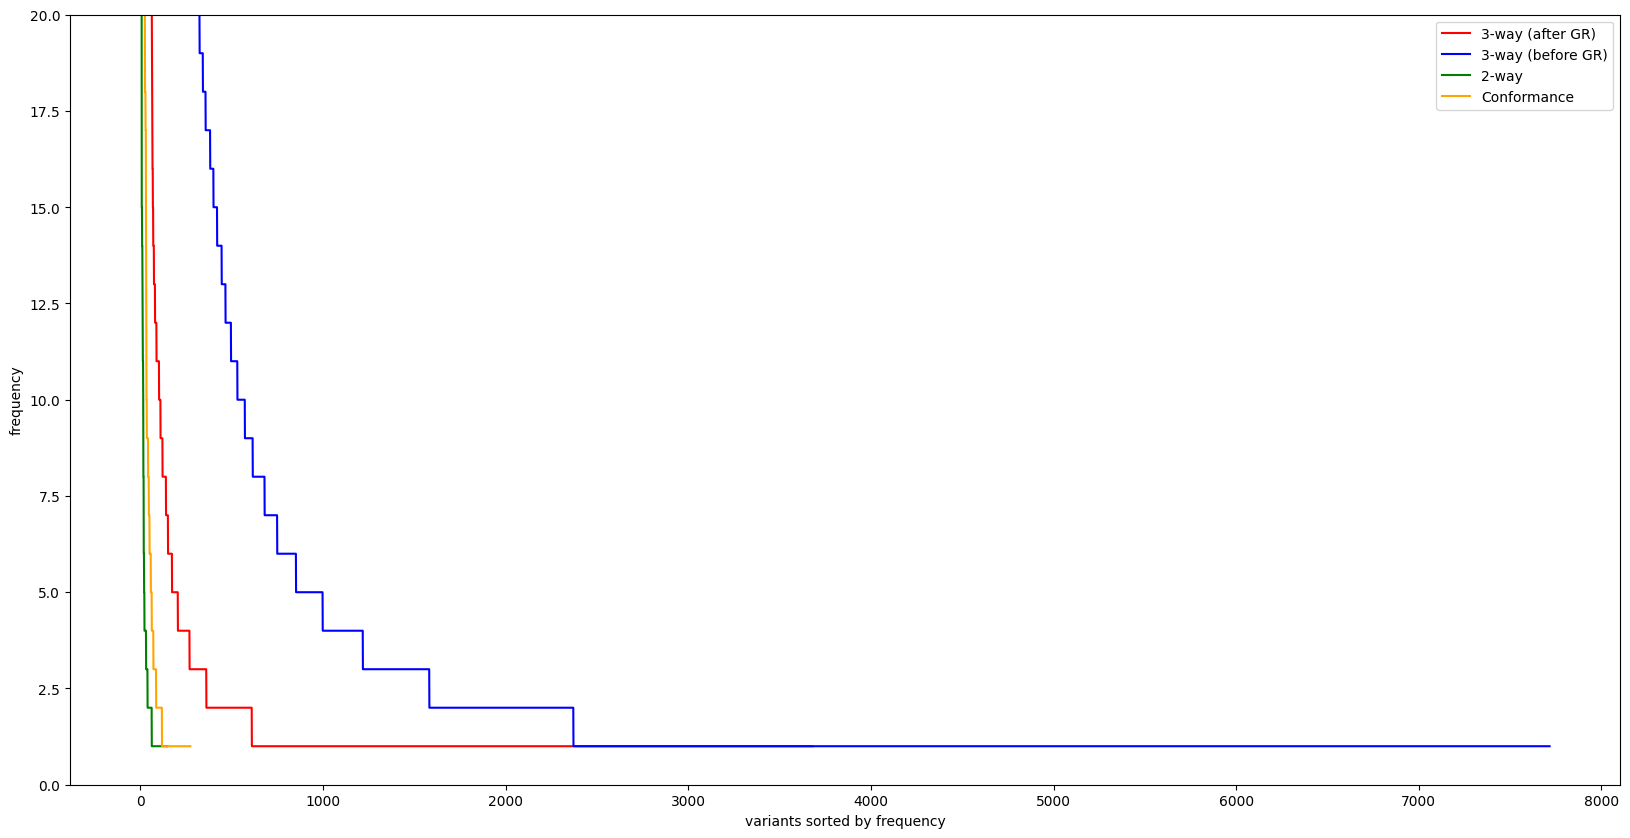

In [ ]:
import matplotlib.pyplot as plt

# variant_distr = [3682, 7717, 147, 274]
colors = ['red', 'blue', 'green', 'orange']

fig = plt.figure(figsize=(20, 10))

plt.plot(variant_distr1, color=colors[0], label='3-way (after GR)')
plt.plot(variant_distr2, color=colors[1], label='3-way (before GR)')
plt.plot(variant_distr3, color=colors[2], label='2-way')
plt.plot(variant_distr4, color=colors[3], label='Conformance')

plt.xlabel('variants sorted by frequency')
plt.ylabel('frequency')
plt.ylim(0, 20)
plt.legend()
plt.show()

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

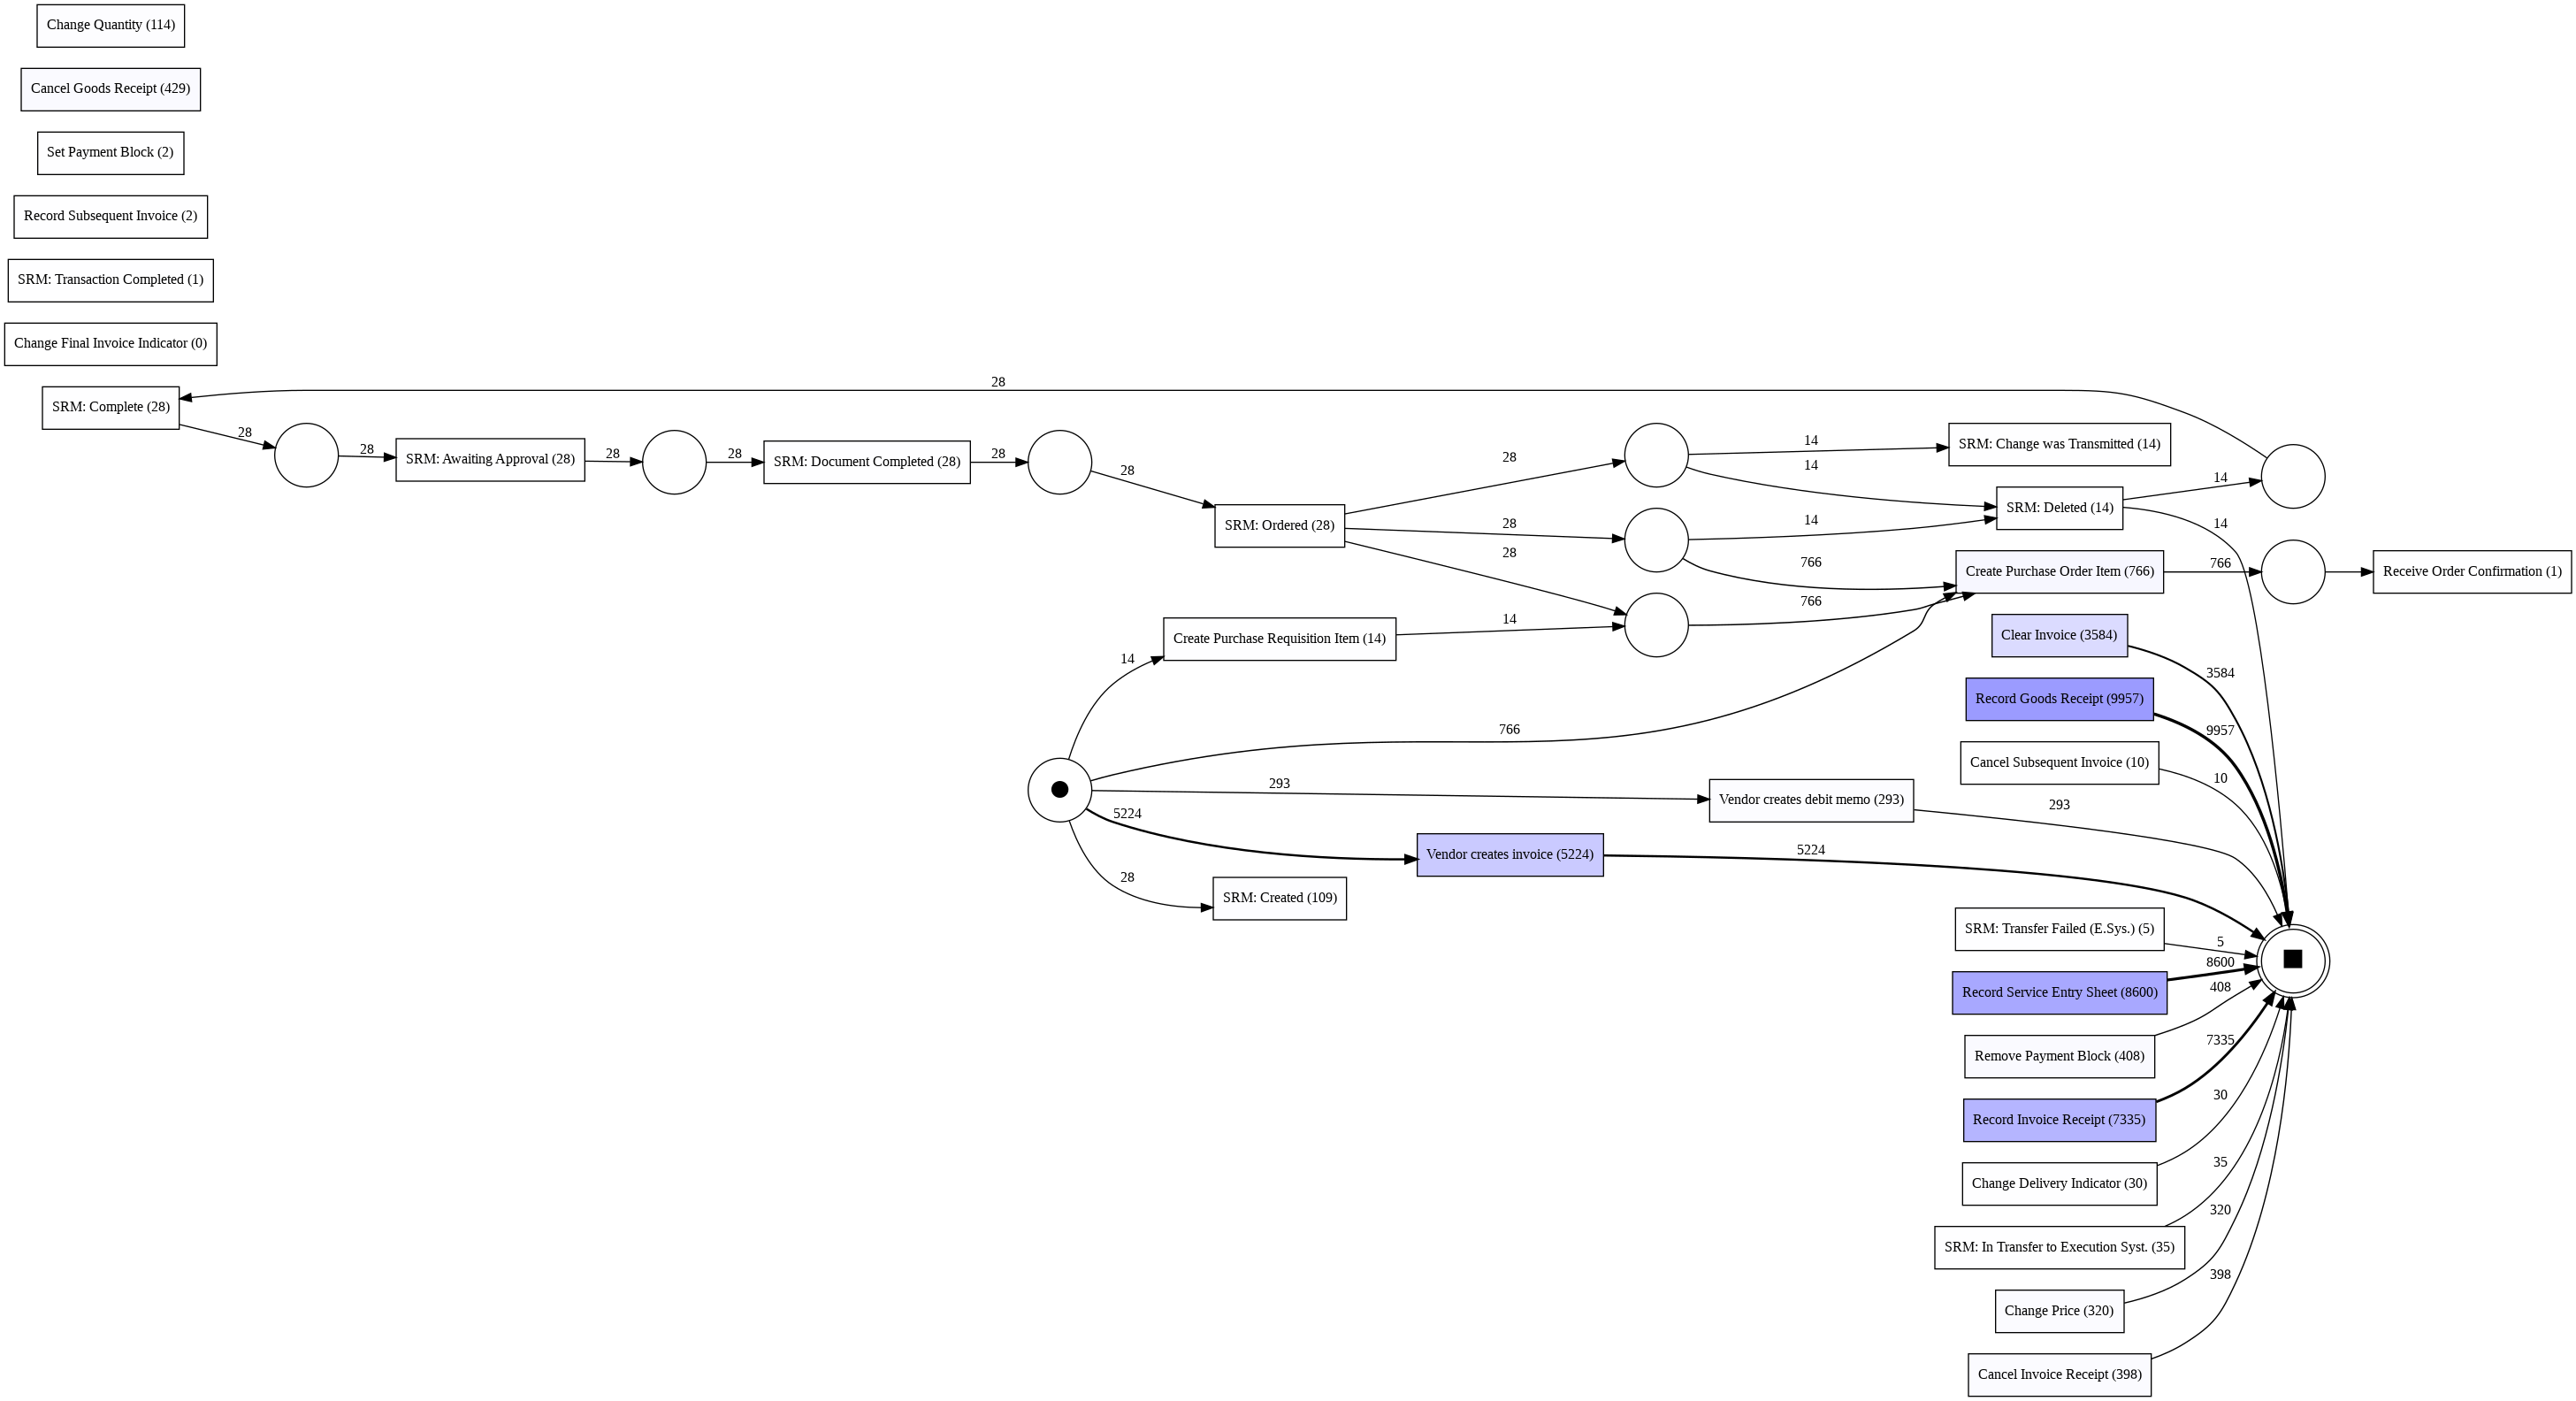

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.2191815996323687, 'log_fitness': 0.16329180132685062, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/34091 [00:00<?, ?it/s]

Precision: 0.15244780417566595


replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Generalization: 0.7762087340599746
Simplicity: 1.0


In [146]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
## Import the petrinet visualizer object
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

net, initial_marking, final_marking = alpha_miner.apply(filtered_log)

# Visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, parameters={alpha_miner.Variants.ALPHA_VERSION_PLUS.value.Parameters.REMOVE_UNCONNECTED:'0:0:0'}, log=filtered_log)
pn_visualizer.view(gviz)

fitness_alpha = replay_fitness_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print("Fitness: " + str(fitness_alpha))

prec_alpha = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print("Precision: " + str(prec_alpha))

gen_alpha = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print("Generalization: " + str(gen_alpha))

simp_alpha = simplicity_evaluator.apply(net)
print("Simplicity: " + str(simp_alpha))

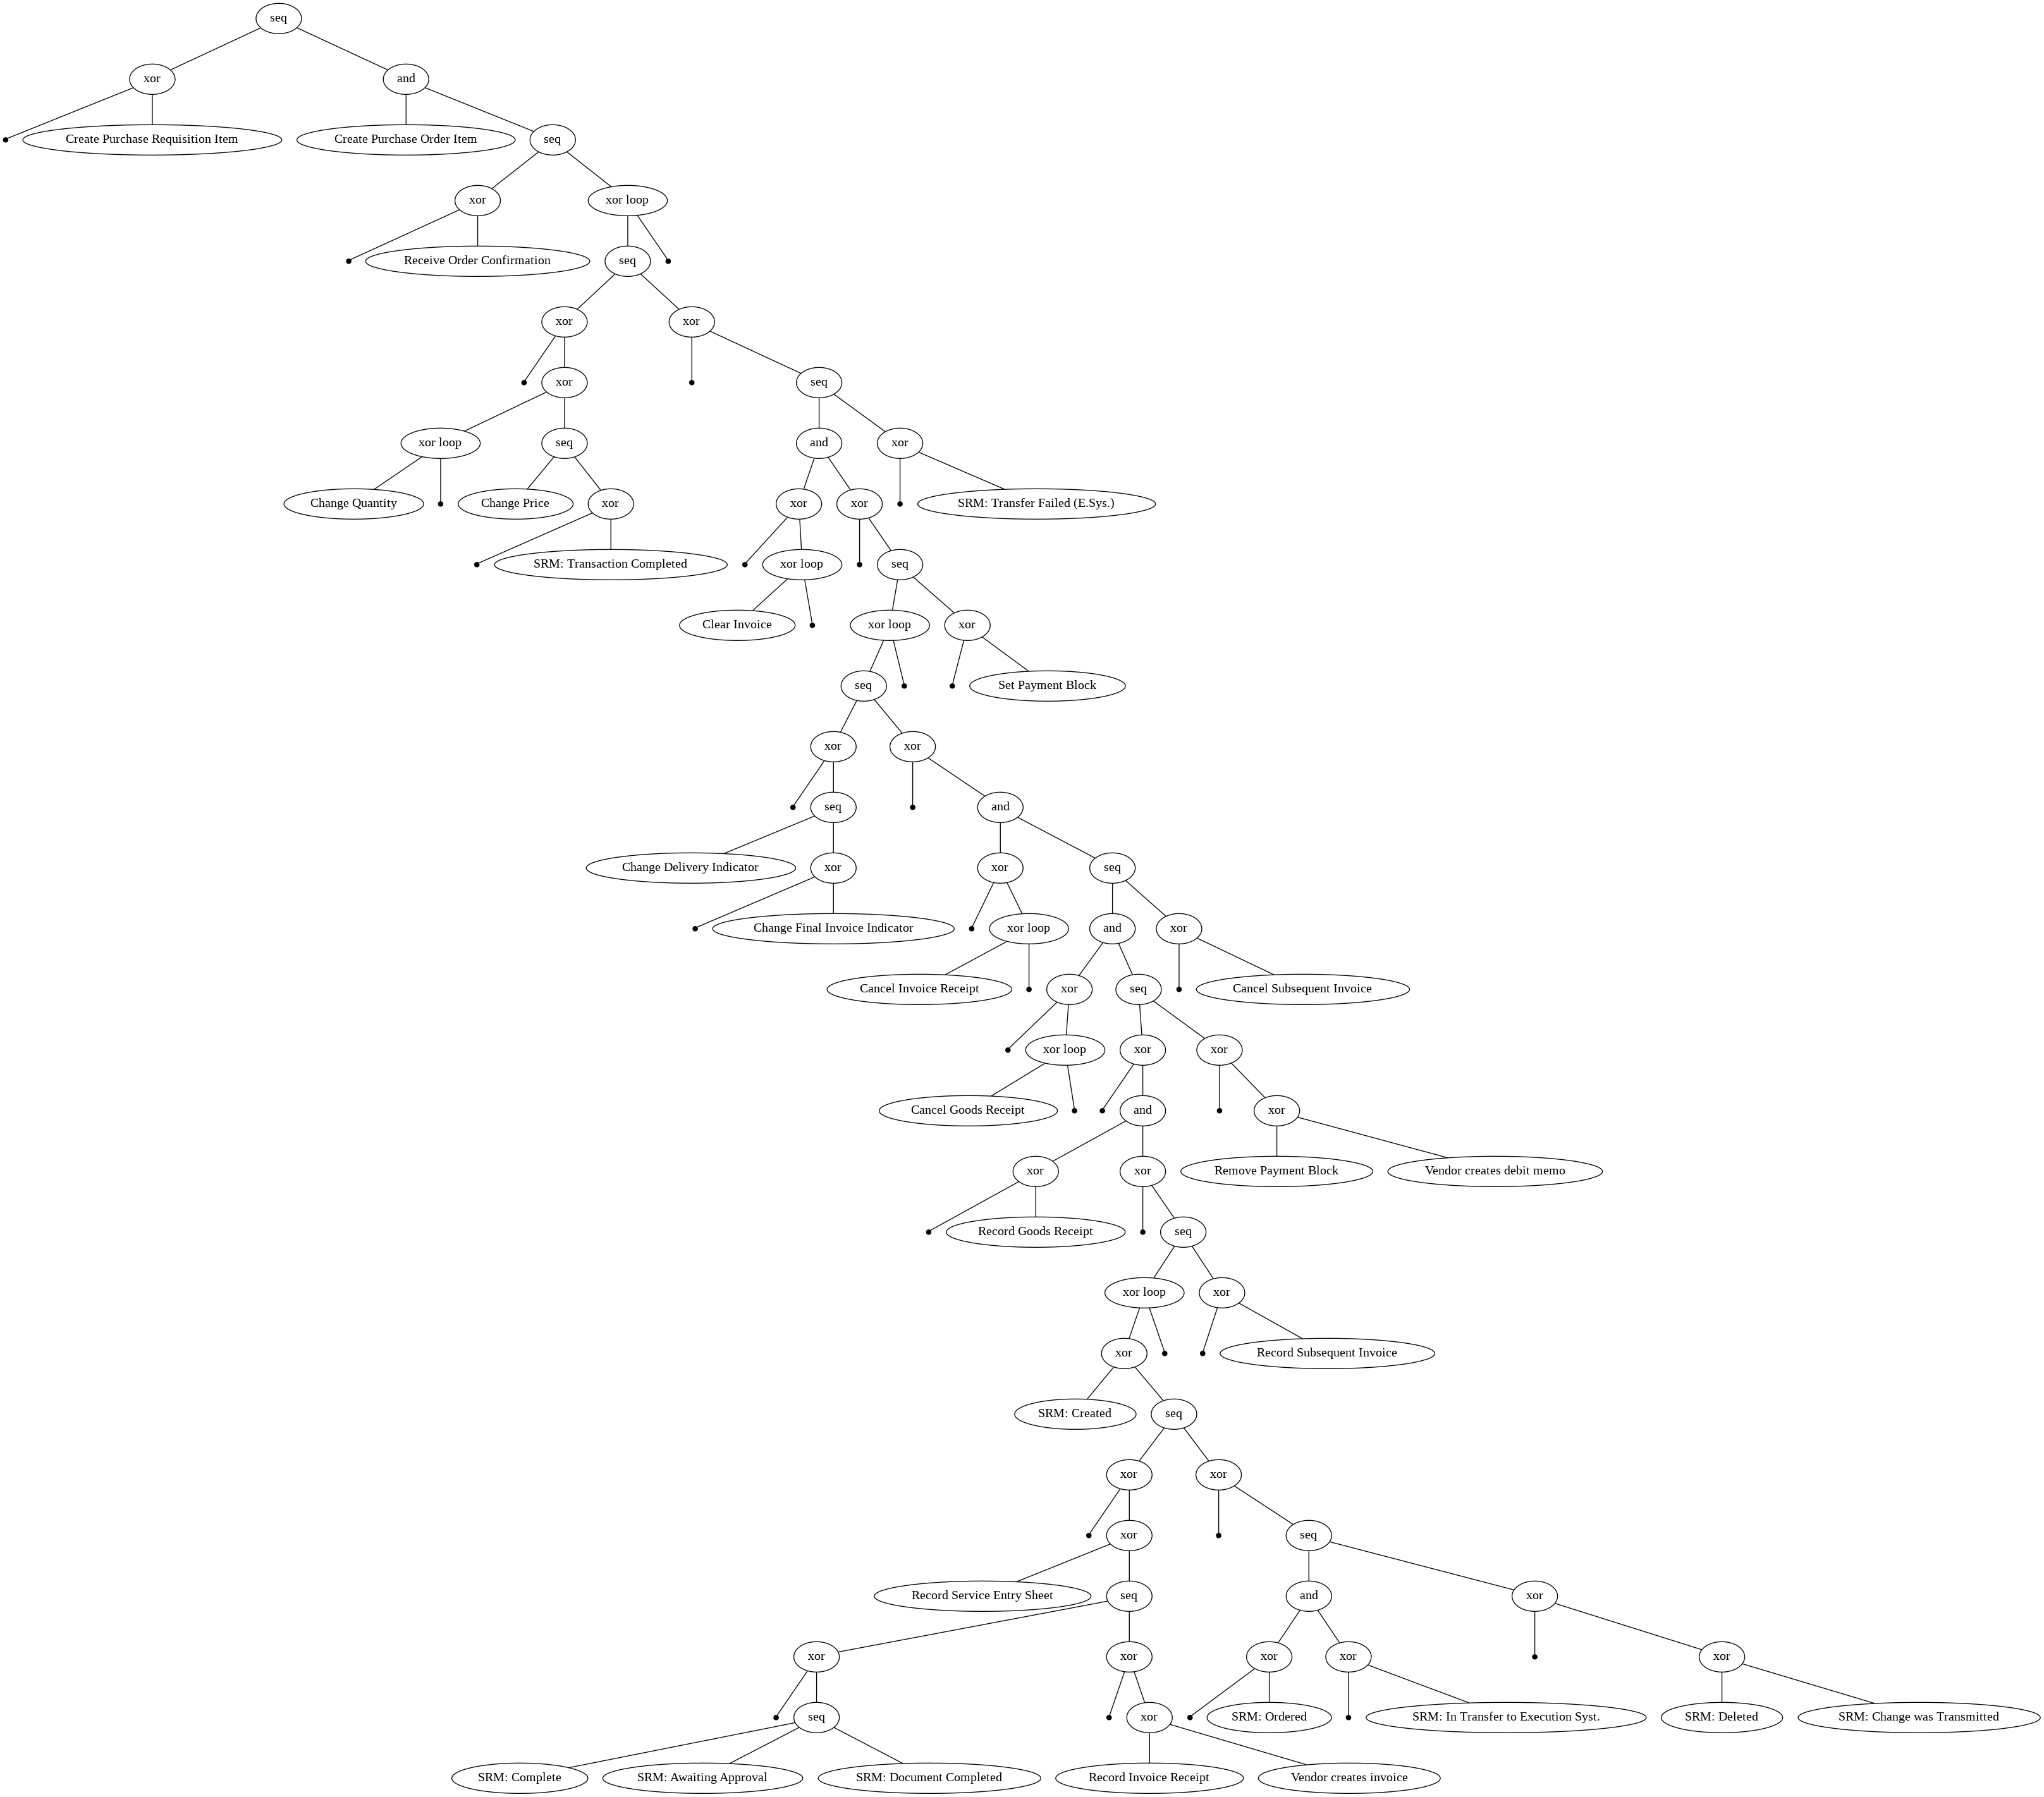

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

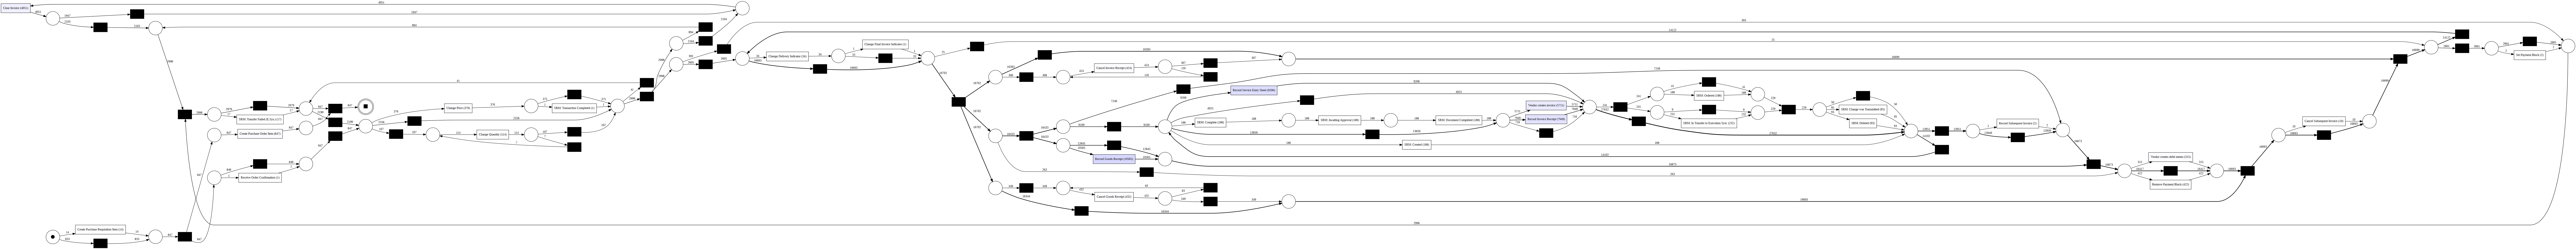

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 4.958677685950414, 'average_trace_fitness': 0.9778409781426854, 'log_fitness': 0.9711623630484858, 'percentage_of_fitting_traces': 4.958677685950414}


replaying log with TBR, completed variants ::   0%|          | 0/34091 [00:00<?, ?it/s]

Precision: 0.16827838623675095


replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Generalization: 0.8899350507822872
Simplicity: 0.6103896103896105


In [147]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.process_tree import visualizer as pt_visualizer
# Discover process tree using inductive miner
tree = inductive_miner.apply(filtered_log)

gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

net, initial_marking, final_marking = pt_converter.apply(tree)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=filtered_log)
pn_visualizer.view(gviz)

fitness_inductive = replay_fitness_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print("Fitness: " + str(fitness_inductive))

prec_inductive = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print("Precision: " + str(prec_inductive))

gen_inductive = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print("Generalization: " + str(gen_inductive))

simp_inductive = simplicity_evaluator.apply(net)
print("Simplicity: " + str(simp_inductive))


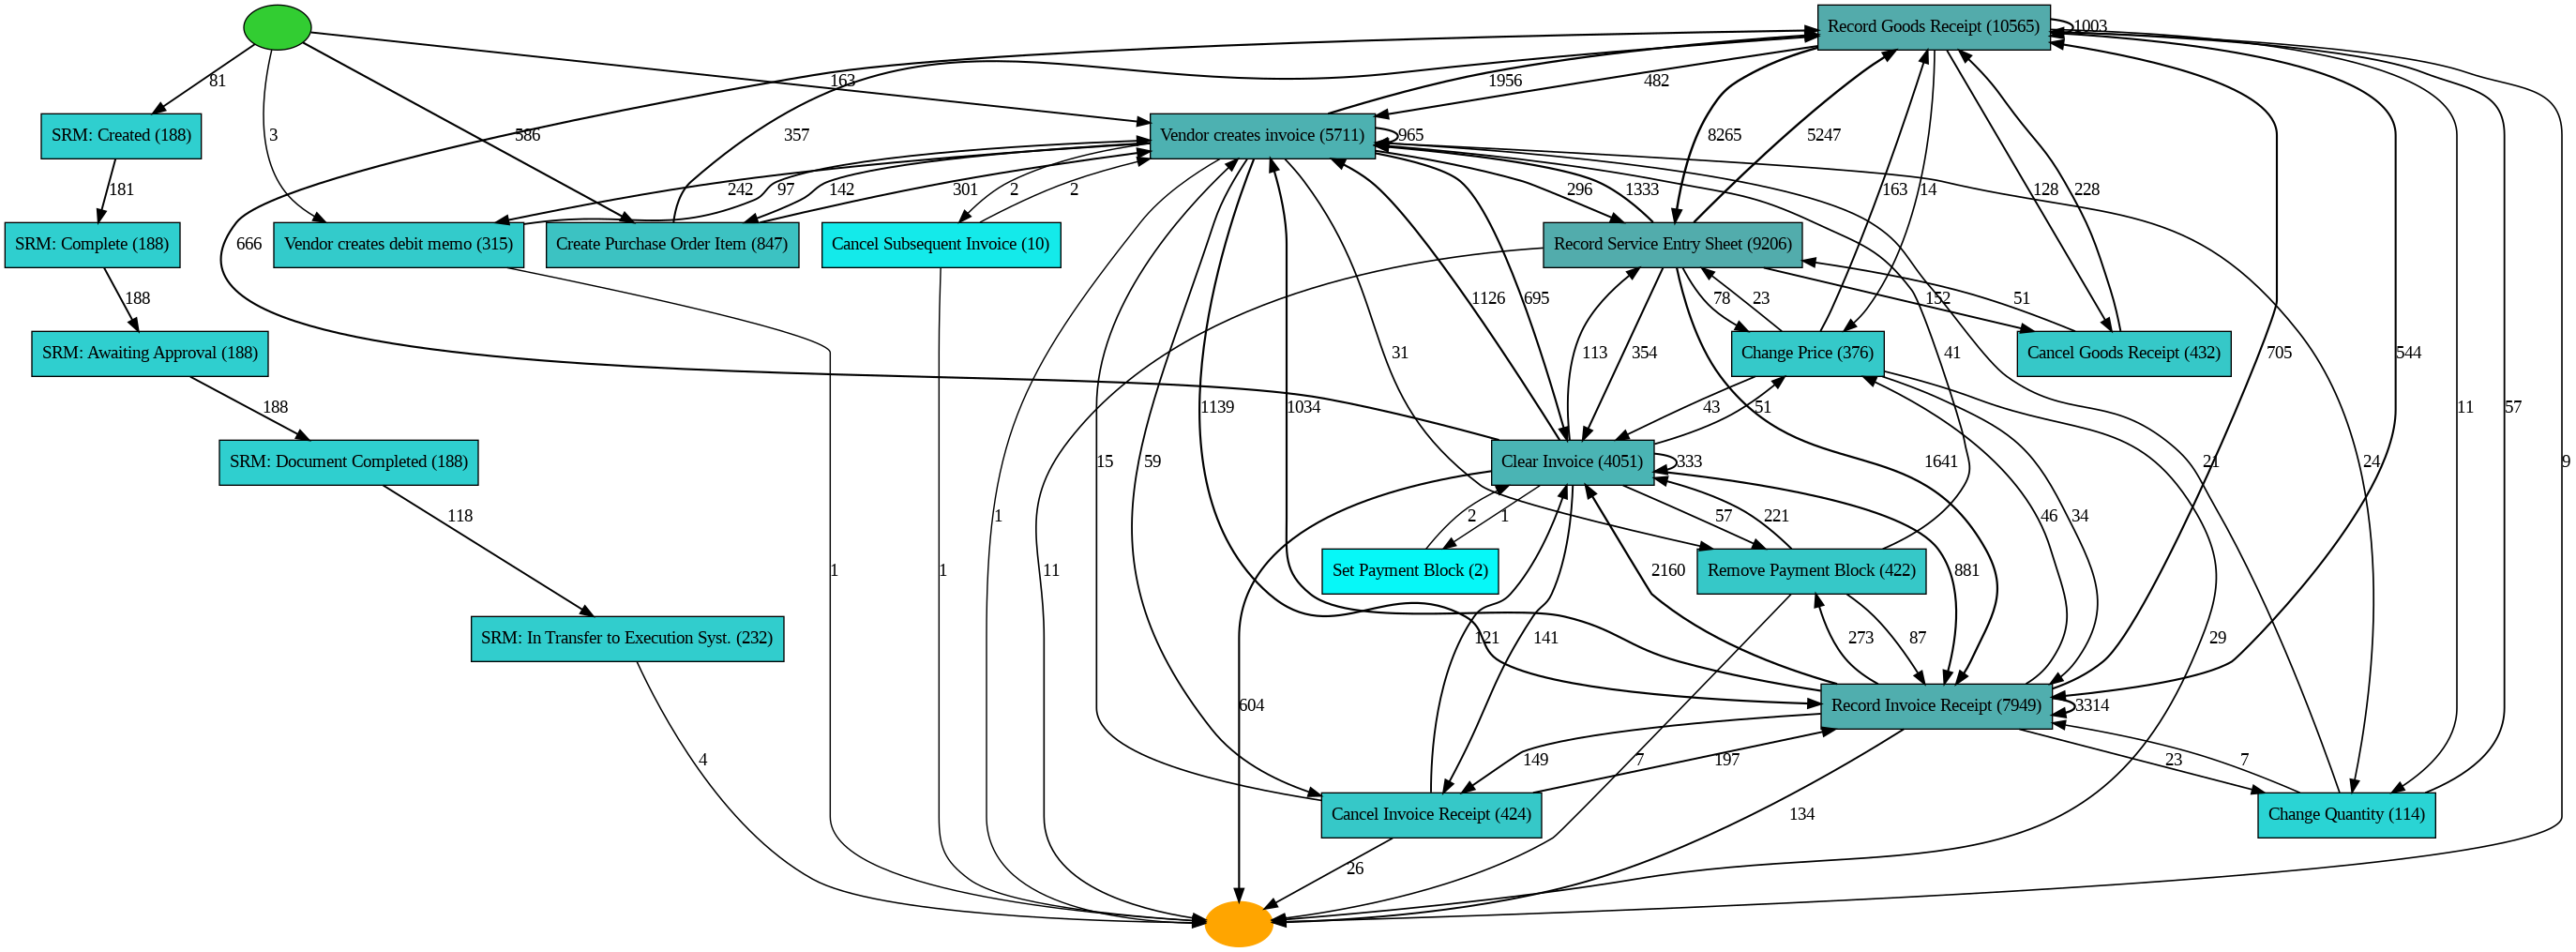

In [149]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net = heuristics_miner.apply_heu(filtered_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(net)
hn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

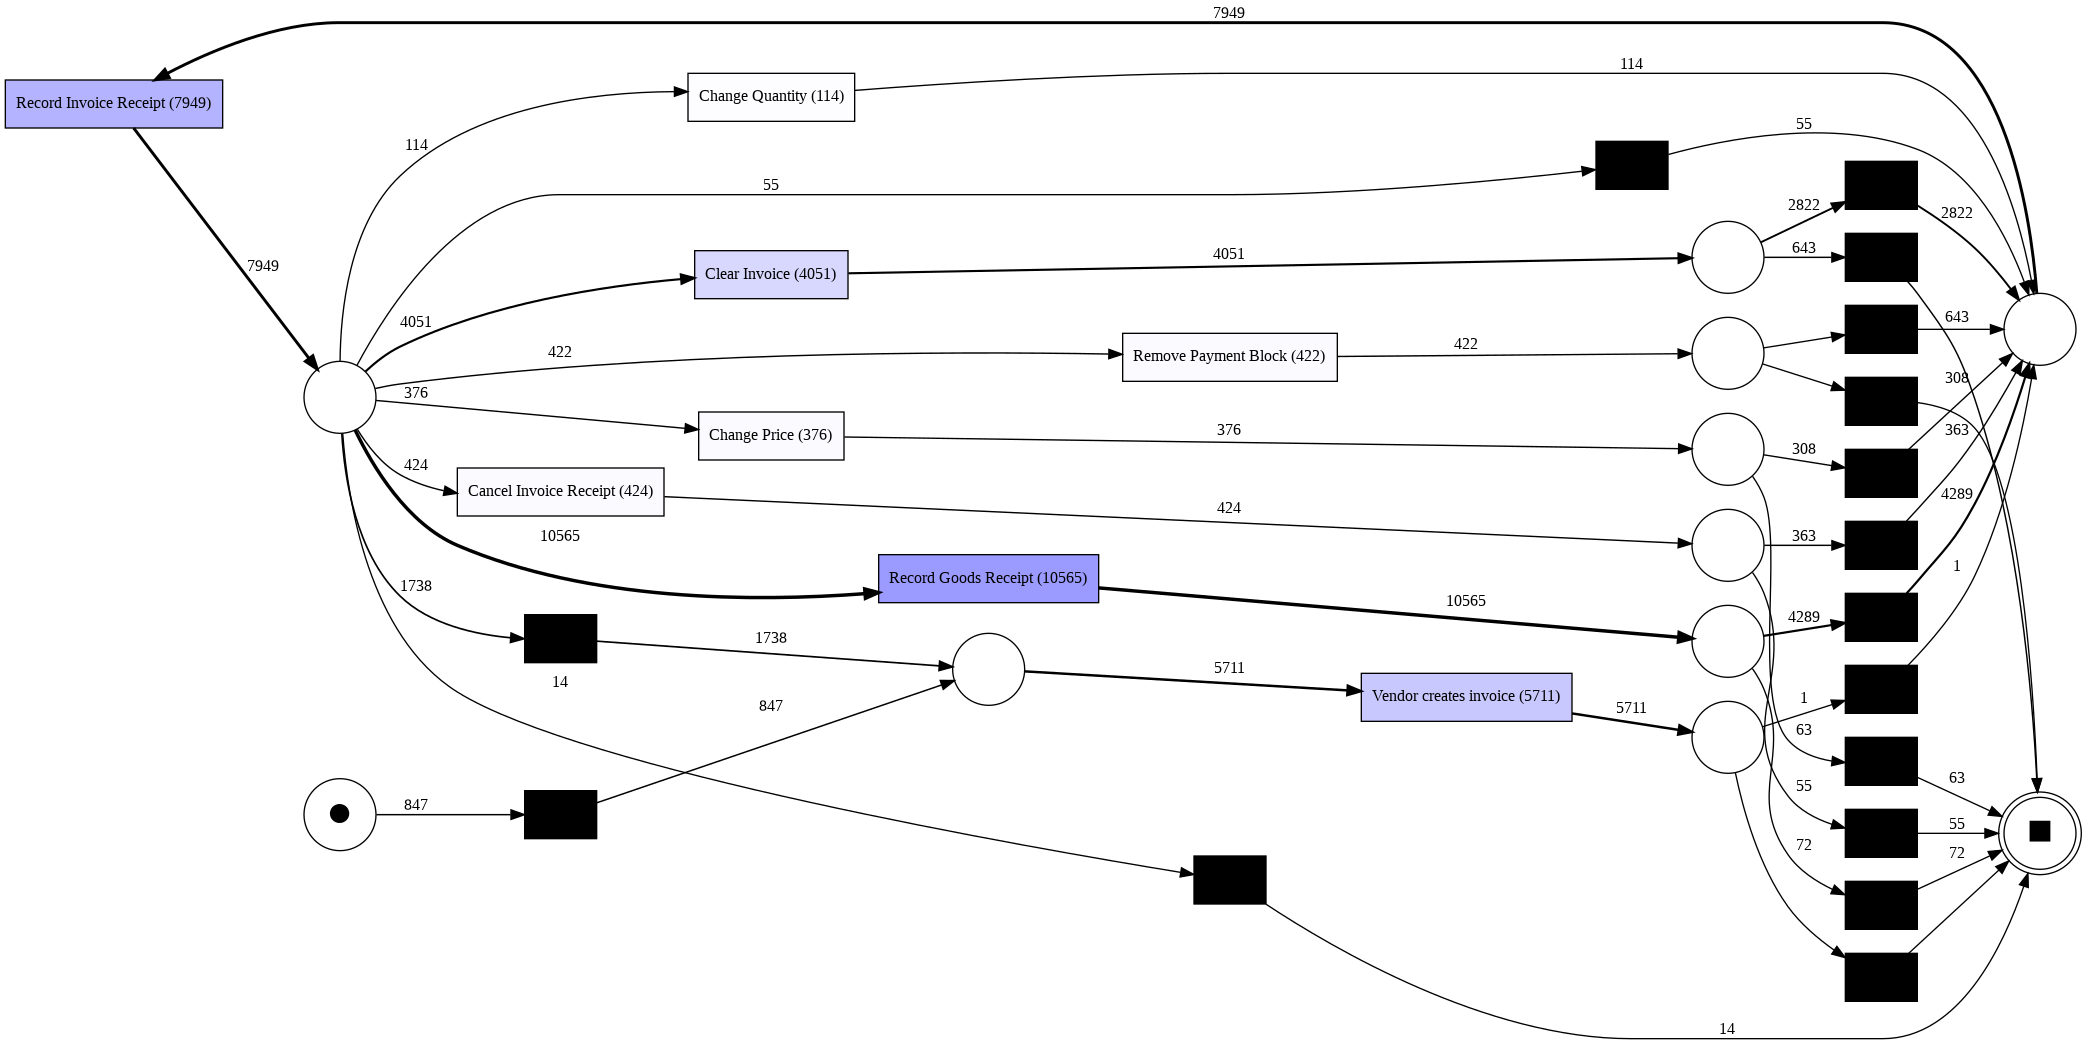

In [150]:
net, initial_marking, final_marking = heuristics_miner.apply(filtered_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9995})

gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=filtered_log)
pn_visualizer.view(gviz)

In [151]:

fitness_heu = replay_fitness_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print("Fitness: " + str(fitness_heu))

prec_heu = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print("Precision: " + str(prec_heu))

gen_heu = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print("Generalization: " + str(gen_heu))

simp_heu = simplicity_evaluator.apply(net)
print("Simplicity: " + str(simp_heu))

replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.647462987835463, 'log_fitness': 0.6710201538498406, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/34091 [00:00<?, ?it/s]

Precision: 0.5399174122505161


replaying log with TBR, completed variants ::   0%|          | 0/771 [00:00<?, ?it/s]

Generalization: 0.7785630482760607
Simplicity: 0.5737704918032787


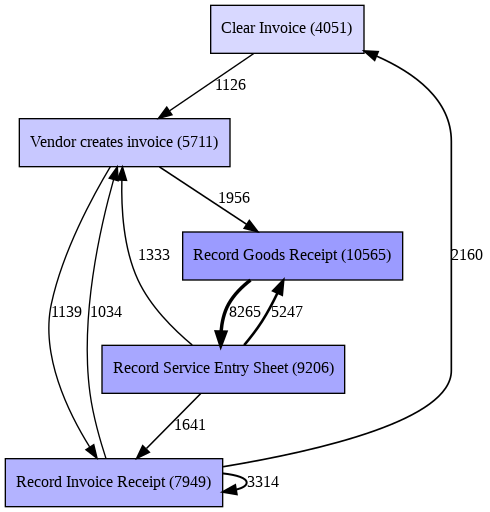

In [152]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(filtered_log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY, parameters={dfg_visualization.Variants.FREQUENCY.value.Parameters.MAX_NO_EDGES_IN_DIAGRAM:10})
dfg_visualization.view(gviz)

In [ ]:
#just to reconvert
#logs = pm4py.convert_to_event_log(log_df)